# Correlations and Correlograms in R
## 1. Introduction


Correlograms (or correlation matrices) are used to investigate the dependence between multiple variables at the same time. The result is a table containing the correlation coefficients (and p-values) between each variable and the others.


### 1.1 How to calculate correlation coefficients using the built-in cor() function

We first import the built-in *iris* dataframe

In [12]:
# Load data
data("iris")
iris[1:10,]

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [13]:
cor_matrix<-cor(iris[,1:4]) #default is pearson
cor_matrix

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


Let's calculate p-values

In [27]:
library(ggplot2)
library(Hmisc)
library(lattice)
library(Formula)
library(survival)

options(repr.plot.width=6, repr.plot.height=4)
cor_matrix_2 <- rcorr(as.matrix(iris[-5]))
cor_matrix_2$r #to visualise the corr coeff
cor_matrix_2$P #to visualise the p-value
#cor_matrix_2$n #to visualise the corr num of observations

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,NA,1.518983e-01,0.000000e+00,0.000000e+00
Sepal.Width,0.1518983,NA,4.513314e-08,4.073229e-06
Petal.Length,0.0000000,4.513314e-08,NA,0.000000e+00
Petal.Width,0.0000000,4.073229e-06,0.000000e+00,NA


### 1.2. Visualize correlations 
There are several ways to do it. Here we show two examples:
1. corrplot
2. GGally

In [36]:
cor_matrix_2$P

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,NA,1.518983e-01,0.000000e+00,0.000000e+00
Sepal.Width,0.1518983,NA,4.513314e-08,4.073229e-06
Petal.Length,0.0000000,4.513314e-08,NA,0.000000e+00
Petal.Width,0.0000000,4.073229e-06,0.000000e+00,NA


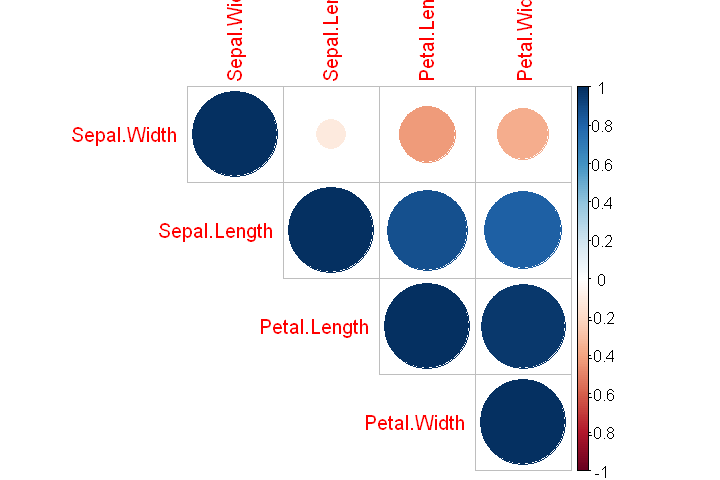

In [37]:
library(corrplot)

corrplot(cor_matrix_2$r, type="upper", order="hclust")

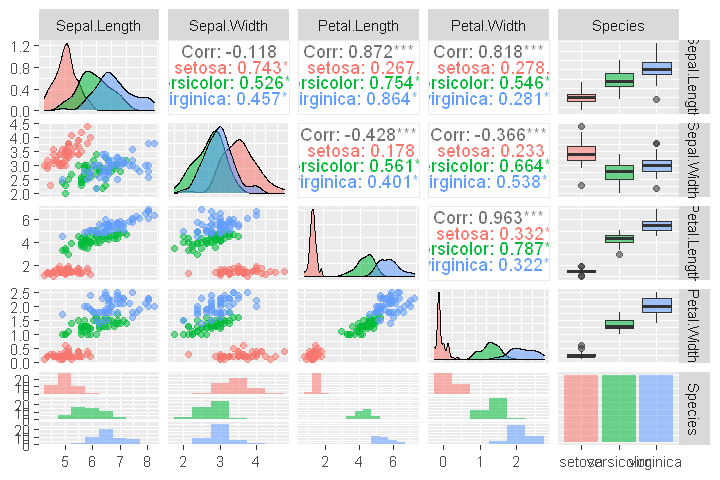

In [29]:
library(GGally)

ggpairs(iris, aes(colour = Species, alpha = 0.4),lower=list(combo=wrap("facethist",  
binwidth=0.5)))

## 2. Correlation matrices: an example with MRI data 

Let's import some Data 

![Title](img/Figure10_SI_HD253.png)

In [6]:
#import variables for correlation from excel file

Data<- read.csv('example_HD235.csv', dec = ".")
colnames(Data)[1]= 'Iron' #rename first column

head(Data)


Iron,ORS,QSM,R2star,Ferritin,Myelin
120.59,58.587,70.375,92.048,10.471,46.067
124.01,93.875,64.962,106.221,15.135,48.365
137.97,122.154,82.615,125.788,11.433,59.471
124.85,156.596,33.269,132.981,13.010,71.115
120.43,154.279,20.067,134.442,13.058,62.125
12.90,6.327,-28.394,114.337,2.962,83.058


In [38]:
#Alternatively

Data %>% head() 

Iron,ORS,QSM,R2star,Ferritin,Myelin
120.59,58.587,70.375,92.048,10.471,46.067
124.01,93.875,64.962,106.221,15.135,48.365
137.97,122.154,82.615,125.788,11.433,59.471
124.85,156.596,33.269,132.981,13.010,71.115
120.43,154.279,20.067,134.442,13.058,62.125
12.90,6.327,-28.394,114.337,2.962,83.058


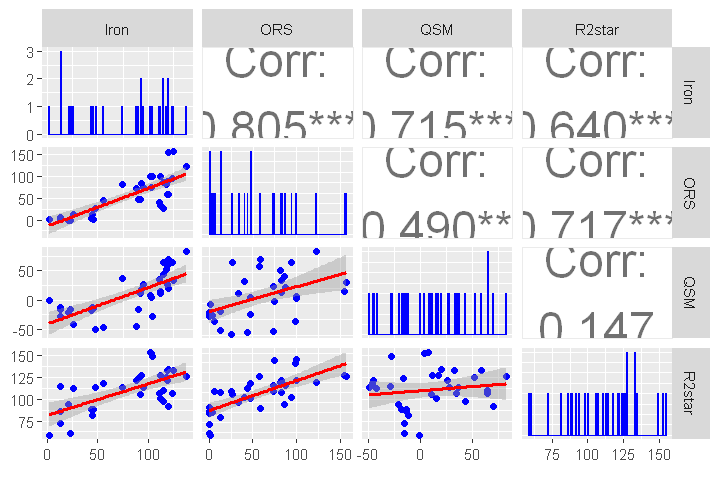

In [42]:
lowerFn <- function(data, mapping, method = "lm", ...) {
  p <- ggplot(data = data, mapping = mapping) +
    geom_point(colour = "blue") +
    geom_smooth(method = method, color = "red",  formula = y ~ x)
  p
}
ggpairs(
  Data[, 1:4], lower = list(continuous = wrap(lowerFn, method = "lm")),
  diag = list(continuous = wrap("barDiag", colour = "blue", binwidth = 0.5)),
  upper = list(continuous = wrap("cor", size = 10))
)

## 2.1 How to costumize correlograms with corrplot()

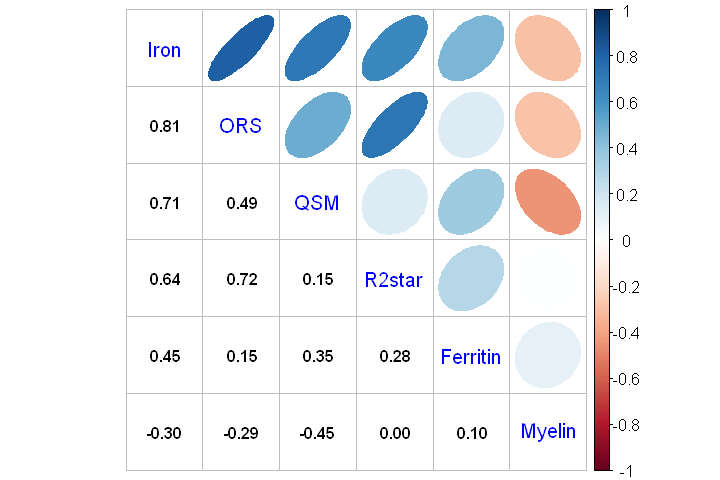

In [26]:
corr_matrix_pears=rcorr(as.matrix(Data), type = "pearson")
CP=round(corr_matrix_pears$r,2) #corr coeff values
PVP=round(corr_matrix_pears$P,3) #p-values

corrplot.mixed(CP,lower='number',upper='ellipse',
               lower.col = "black", number.cex = .8,
               tl.col = "blue",
             )



Table of p-values

In [12]:
PVP

,Iron,ORS,QSM,R2star,Ferritin,Myelin
Iron,NA,0.000,0.000,0.000,0.008,0.084
ORS,0.000,NA,0.003,0.000,0.391,0.100
QSM,0.000,0.003,NA,0.405,0.045,0.007
R2star,0.000,0.000,0.405,NA,0.112,0.979
Ferritin,0.008,0.391,0.045,0.112,NA,0.558
Myelin,0.084,0.100,0.007,0.979,0.558,NA


## 3. Print Dependences
Packages and R version used in this tutorial

In [13]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18363)

Matrix products: default

locale:
[1] LC_COLLATE=Dutch_Netherlands.1252  LC_CTYPE=Dutch_Netherlands.1252   
[3] LC_MONETARY=Dutch_Netherlands.1252 LC_NUMERIC=C                      
[5] LC_TIME=Dutch_Netherlands.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] GGally_2.1.2    corrplot_0.90   Hmisc_4.5-0     ggplot2_3.3.5  
[5] Formula_1.2-4   survival_3.2-11 lattice_0.20-38

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1          png_0.1-7           digest_0.6.18      
 [4] utf8_1.1.4          IRdisplay_0.7.0     R6_2.4.0           
 [7] plyr_1.8.4          repr_0.19.2         backports_1.1.4    
[10] evaluate_0.13       pillar_1.6.2        rlang_0.4.11       
[13] uuid_0.1-2          rstudioapi_0.10     data.table_1.12.2  
[16] rpart_4.1-15        Matrix_1.2-17       chec